In [1]:
import helper

translator, data, targets = helper.get_data("../mel-grams")
data = [img.reshape(-1) for img in data]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, targets, test_size=0.2, shuffle=True, random_state=0)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [4]:
bagging_classifier = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=27,weights='distance', metric="manhattan"),
                                      random_state=0).fit(X_train, y_train)

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_true, y_pred = y_test, bagging_classifier.predict(X_test)
print(classification_report(y_true, y_pred))
print()
print(accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.53      0.73      0.62        11
           2       0.00      0.00      0.00        26
           3       0.57      0.17      0.26        24
           4       0.30      0.48      0.37        27
           5       0.18      0.56      0.27        16
           6       0.33      0.83      0.47        18
           7       0.65      0.65      0.65        23
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        20

    accuracy                           0.33       200
   macro avg       0.31      0.35      0.28       200
weighted avg       0.29      0.33      0.26       200


0.325


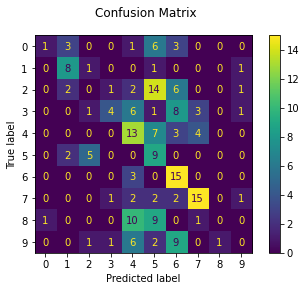

In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics

disp = metrics.plot_confusion_matrix(bagging_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
disp.figure_.savefig("bagging.png")

In [7]:
translator

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}